In [21]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [8]:
IMG_HEIGHT, IMG_WIDTH = 128, 128  
BATCH_SIZE = 32
DATA_DIR = 'Dataset/training' 

In [9]:
train_datagen = ImageDataGenerator(
    rescale=0.2,
    validation_split=0.2  
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 134 images belonging to 5 classes.


In [11]:
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 31 images belonging to 5 classes.


In [12]:
num_classes = len(train_generator.class_indices)
print(num_classes)

5


In [73]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Per classificazione
])

c:\Users\Manuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [75]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20


c:\Users\Manuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.2440 - loss: 68.7302 - val_accuracy: 0.2258 - val_loss: 5.6961
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.1841 - loss: 9.2360 - val_accuracy: 0.2903 - val_loss: 1.8047
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.3158 - loss: 1.9574 - val_accuracy: 0.2903 - val_loss: 1.6756
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.3170 - loss: 1.7349 - val_accuracy: 0.4516 - val_loss: 1.5082
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.3056 - loss: 1.6498 - val_accuracy: 0.2258 - val_loss: 1.5502
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.3019 - loss: 1.5341 - val_accuracy: 0.2258 - val_loss: 1.5088
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.3542 - loss: 1.5423 - val_accuracy: 0.7097 - val_loss: 1.4630
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.4793 - loss: 1.4086 - val_accuracy: 0.6129 - val_loss: 1.2332
Ep

In [76]:

loss, accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8710 - loss: 0.4127
Test Loss: 0.4126669764518738
Test Accuracy: 0.8709677457809448


In [77]:
model.save('modello_multiriga.h5')

In [13]:
from tensorflow.keras.models import load_model
model = load_model('modello_multiriga.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


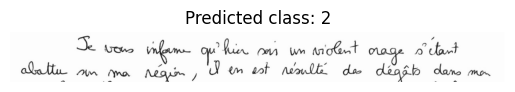

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


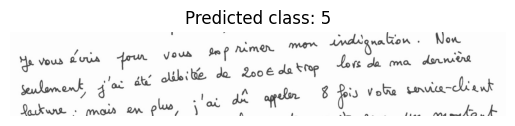

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


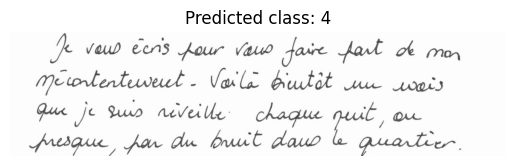

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


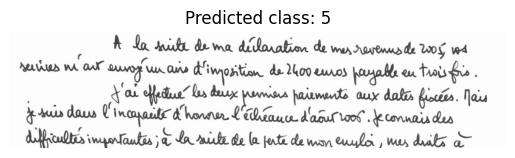

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


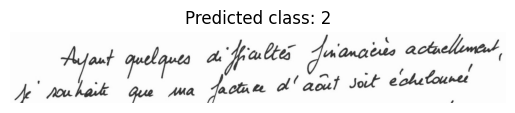

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


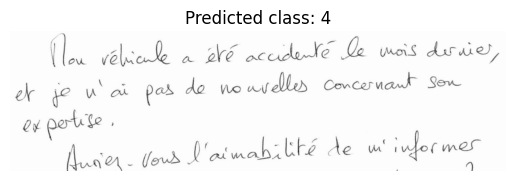

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


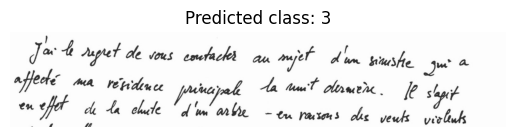

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


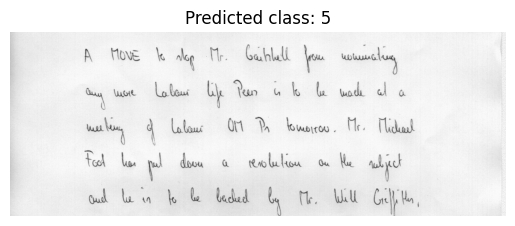

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


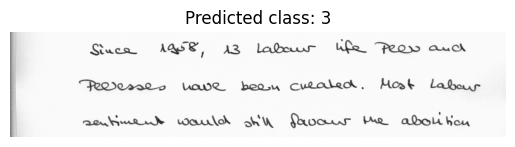

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


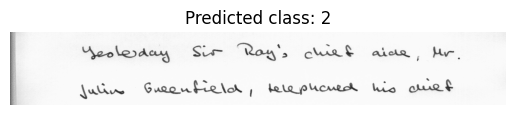

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


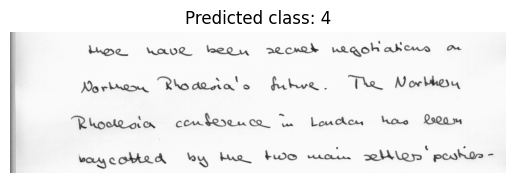

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


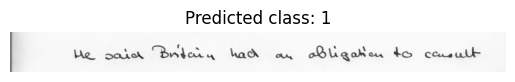

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


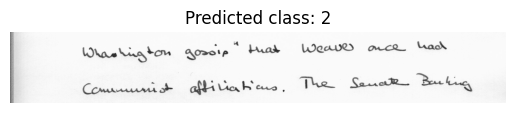

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


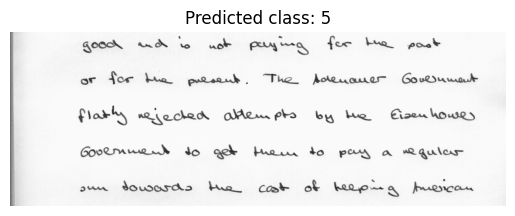

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


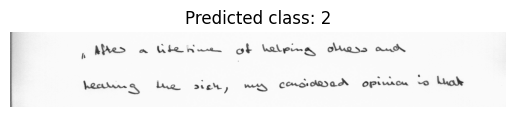

In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_images_path = 'plot_images_test'
for filename in os.listdir(test_images_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')): 
        image_path = os.path.join(test_images_path, filename)
        
        new_image = preprocess_image(image_path)
    
        predictions = model.predict(new_image)
        predicted_class = np.argmax(predictions, axis=1)
    
        plt.imshow(load_img(image_path))
        plt.title(f'Predicted class: {predicted_class[0] + 1}')
        plt.axis('off')
        plt.show()